In [1]:
#Modified National Institute of Standards and Technology database
#is a database of handwritten digits used for training image processing systems. 

In [2]:
#tensorflow to develop neural networks and to make them faster and easier
#matplotlib for graphical visulaisations. It is a plotting library
#random to make predictions. Whenever we make predictions we use random

import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
import random

In [3]:
#we also download and import the dataset, instead we'll import and load it with the help of keras
mnist=tf.keras.datasets.mnist

In [4]:
#Data loaded into mnist will be splitted into training and testing
#Loading data into training and testing by executing load_data function on mnist
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

In [5]:
#Pixel values of xtrain and xtest in the dataset range from 0 to 255.
#So instead of having so large values we'll modify the xtrain, xtest values
#normalising the images by scaling the pixel intensities to the range 0 to 1
xtrain=xtrain/255
xtest=xtest/255
#Now we'll get the xtrain, xtest pixel intensity values ranging from 0 to 1.

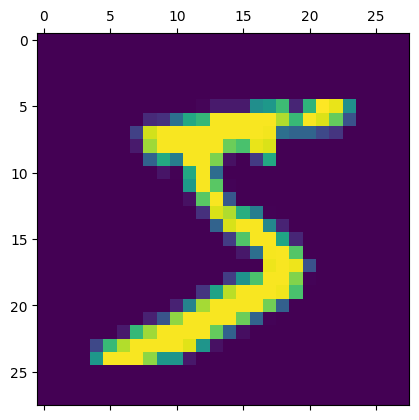

In [6]:
#to see how first image looks
plt.matshow(xtrain[0])

In [7]:
#Defining the network architecture using keras
#Using the sequential method from keras to implement the feed forward neural network.

model=keras.Sequential([
    #flattening the input to first layer. Converting the input into vector form of shape 28x28
    keras.layers.Flatten(input_shape=(28,28)),
    #Having 40 neurons in the hidden layer and using relu activation function
    keras.layers.Dense(40,activation='relu'),
    #taking 15 neurons in the output layer and using softmax activation function
    keras.layers.Dense(15,activation='softmax')
    ])

In [8]:
#gives what is happening at the input layer, at the hidden and output layer in the format of table
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 40)                31400     
                                                                 
 dense_1 (Dense)             (None, 15)                615       
                                                                 
Total params: 32,015
Trainable params: 32,015
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer = 'sgd',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [10]:
history = model.fit(xtrain,ytrain,validation_data = (xtest,ytest), epochs = 3)

Epoch 1/3
   1/1875 [..............................] - ETA: 5:02 - loss: 2.8127 - accuracy: 0.0000e+00

2023-11-05 23:37:34.985467: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 1s 666us/step - loss: 0.7310 - accuracy: 0.8131 - val_loss: 0.3776 - val_accuracy: 0.8968
Epoch 2/3
1875/1875 [==============================] - 1s 597us/step - loss: 0.3552 - accuracy: 0.9000 - val_loss: 0.3126 - val_accuracy: 0.9128
Epoch 3/3
1875/1875 [==============================] - 1s 580us/step - loss: 0.3088 - accuracy: 0.9121 - val_loss: 0.2837 - val_accuracy: 0.9210


In [11]:
#calling the evaluate method on model to determine test loss and test accuracy

test_loss,test_acc = model.evaluate(xtest,ytest)
print("Loss = " ,test_loss)
print("Accuracy =" ,test_acc)

313/313 [==============================] - 0s 464us/step - loss: 0.2837 - accuracy: 0.9210
Loss =  0.2837092876434326
Accuracy = 0.9210000038146973


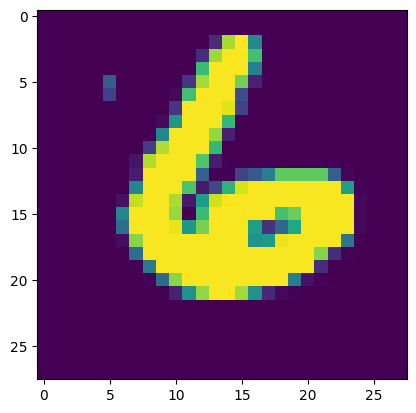

313/313 [==============================] - 0s 471us/step


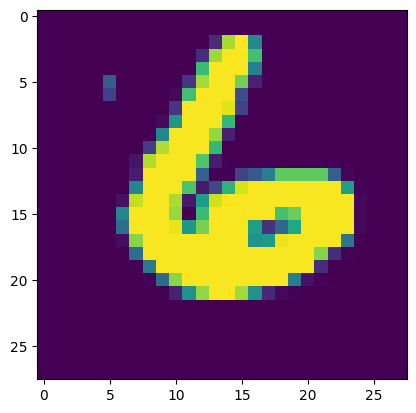

In [12]:
#generating random number from 0 to 9999 bcoz our dataset contains 10000 entries and storing it into n.
#passing n into xtest[0] and then using it for prediction.

n=random.randint(0,9999)
plt.imshow(xtest[n])
plt.show()

predicted_value=model.predict(xtest)
plt.imshow(xtest[n])
plt.show()

In [13]:
predicted_value=model.predict(xtest)
print('Predicted Value: ', predicted_value)

313/313 [==============================] - 0s 435us/step
Predicted Value:  [[9.48540910e-05 5.42787234e-07 3.29273142e-04 ... 2.46430460e-07
  1.53702672e-06 2.56255544e-06]
 [4.14410466e-03 1.32363886e-04 8.84243071e-01 ... 1.14496231e-06
  2.21748769e-06 6.38161191e-06]
 [1.07113076e-04 9.69008505e-01 8.20584130e-03 ... 4.95163084e-04
  2.97712017e-04 2.44326220e-04]
 ...
 [4.35404758e-07 1.83437635e-06 2.52677382e-05 ... 1.06325456e-06
  1.64394658e-06 2.55780208e-07]
 [1.81447179e-03 1.97022920e-03 4.51443484e-04 ... 1.48609339e-04
  2.74428658e-05 7.48376078e-06]
 [2.91228702e-04 2.41830511e-09 3.07712937e-04 ... 3.58600225e-08
  1.29995037e-09 2.22687522e-08]]


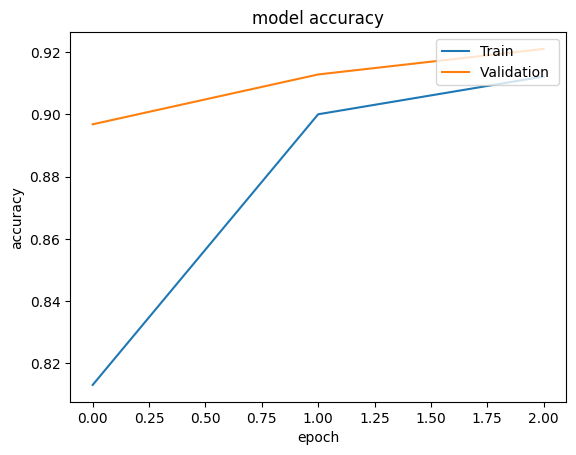

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history[ 'val_accuracy'])
plt.title('model accuracy')
plt. ylabel ('accuracy')
plt. xlabel ('epoch')
plt.legend([ 'Train','Validation '],
loc= 'upper right')
plt.show()

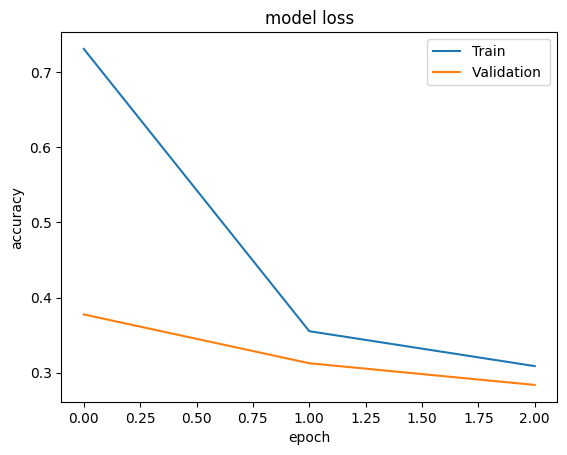

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history[ 'val_loss'])
plt.title('model loss')
plt. ylabel ('accuracy')
plt. xlabel ('epoch')
plt.legend([ 'Train','Validation '],
loc= 'upper right')
plt.show()